<br>

###  <font color="Coral">hw8pr1digits_dreamer</font>   

For this hw8pr1digits_dreamer challenge, you'll leverage how NNets are the most capable model for imputing - or "hallucinating" - or _generating_ missing data 

Here, we'll put them to the test, to <font color="DodgerBlue"><b>dream</b></font> the unseen portion of a digit, only part of which is visible:



In [112]:
#
# Here, we have a one-pixel predictor, to get you started...


In [113]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df

digits.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [115]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns
coltodrop = df.columns[65]     # get last column name (with the url)
df_clean = df.drop(columns=[coltodrop])  # drop by name is typical
df_clean.info()                         # should be happier!
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [116]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS: {COLUMNS}")  

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX: {COL_INDEX}")

# and for our "SPECIES"!
SPECIES = [ str(i) for i in range(0,10) ]  # list with a string at each index (index -> string)
SPECIES_INDEX = { s:int(s) for s in SPECIES }  # dictionary mapping from string -> index

# and our "target labels"
print(f"SPECIES: {SPECIES}")  
print(f"SPECIES_INDEX: {SPECIES_INDEX}")

COLUMNS: Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
COL_INDEX: {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25

In [117]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_clean.to_numpy()    # .values gets the numpy array
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(f"A's shape is {A.shape}")
print(A)

A's shape is (1768, 65)
[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [118]:
#
# You will explore a different direction: "hallucinating" new data!
#      This is sometimes called "imputing" missing data.
#

# First, build a regressor that
#      + uses the first 48 pixels (6 image rows) to predict the floating-point value of pix52
#      + we'll see how accurate it is...
#      + then, you'll expand this process to build a regressor for _each_ pixel indexed from 48-63
#      + and use those to "imagine" the bottom two rows of the digits...

In [119]:
#
# some starting code is provided here...
#

In [120]:
#
# regression model that uses as input the first 48 pixels (pix0 to pix47)
#                       and, as output, predicts the value of pix52
#

print("+++ Start of regression prediction of pix52! +++\n")

X_all = A[:,0:48]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
y_all = A[:,52]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

print(f"y_all (just target values, pix52)   is \n {y_all}") 
print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

+++ Start of regression prediction of pix52! +++

y_all (just target values, pix52)   is 
 [ 3.  9. 10. ... 15.  7.  8.]
X_all (just features: 3 rows) is 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.]]


In [121]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print("labels (target)\n",y_all)
print("features\n", X_all[:3,:])

labels (target)
 [16.  6. 15. ... 10.  4.  3.]
features
 [[ 0.  8. 16. 12. 15. 16.  7.  0.  0. 13. 16. 14.  6.  4.  1.  0.  0. 12.
  10.  0.  0.  0.  0.  0.  0.  3. 16. 10.  0.  0.  0.  0.  0.  0.  6. 15.
   9.  0.  0.  0.  0.  0.  0.  4. 16.  2.  0.  0.]
 [ 0.  2. 13. 16. 15.  1.  0.  0.  0.  7. 13. 10. 16.  4.  0.  0.  0.  0.
   0.  8. 16.  2.  0.  0.  0.  0.  8. 16. 16. 10.  0.  0.  0.  0.  1.  4.
  10. 16.  8.  0.  0.  0.  0.  0.  0. 16.  9.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.  0.  2. 16. 10. 11. 15.  0.  0.  0.  0.
  15.  4.  4. 16.  3.  0.  0.  0.  3.  3.  5. 16.  1.  0.  0.  0.  0.  0.
   9. 13.  0.  0.  0.  0.  0.  1. 16.  7.  0.  0.]]


In [122]:
#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [16.  9.  8. 13. 16.  9. 11. 10. 15.  7. 10. 15. 13.  3.  0.  4.  9. 16.
  3. 10. 14.  1. 12.  8. 16.  9. 15. 10.  4.  9. 13. 14.  5.  8.  4.  8.
 16. 16. 11.  6. 16. 15. 16.  5. 15.  9.  2.  8.  2.  5. 16. 13.  1.  5.
  8.  7.  4.  5. 13. 10. 14. 13.  4. 16.  2. 12. 13.  9. 12. 16. 16. 10.
 11. 12. 16.  0. 12. 16. 11. 15. 13. 15.  2.  8. 16.  4.  1. 13.  9.  2.
  0. 16.  0.  8.  8. 16.  2.  5.  3.  6.  5. 10.  0.  4. 12.  5.  7.  6.
 14.  6. 16.  5.  3.  9.  0.  8. 16.  6.  9.  2. 16. 14.  9.  5. 12. 11.
 12. 11. 16.  8. 15.  9.  4. 10. 14.  2.  4.  5. 16.  7.  8. 15. 16.  0.
 12. 16.  8.  3. 12. 11. 15. 15. 16. 12. 10. 14. 16.  8. 16.  4. 13. 13.
 16. 16. 11. 16.  0.  3.  8. 15. 10.  4.  0.  0. 16.  8. 16.  4. 13. 11.
 10.  9.  7.  0.  7.  5. 16.  9.  0.  3. 16.  1.  8. 14. 10. 13. 14. 16.
  8.  1.  7. 10. 13. 16.  4. 13. 13.  4. 12. 16. 10. 12. 14. 11.  5.  4.
  0.  2. 12. 10. 11. 16.  1.  

In [123]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
# 
from sklearn.preprocessing import StandardScaler
USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here is a fully-scaled dataset:

X_all_scaled = scaler.transform(X_all)
y_all_scaled = y_all.copy()      # not scaled


# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler

def ascii_table(X,y):
    """ print a table of binary inputs and outputs """
    print(f"{'input ':>70s} -> {'pred':<5s} {'des.':<5s}") 
    for i in range(len(y)):
        s_to_show = str(X[i,:])
        s_to_show = s_to_show[0:60]
        print(f"{s_to_show!s:>70s} -> {'?':<5s} {y[i]:<5.0f}")   # !s is str ...
    
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])

#
# Note that the zeros have become -1's
# and the 1's have stayed 1's
#

                                                                input  -> pred  des. 
          [ 0.         -0.33867241  0.59669629  0.73498373 -0.66494799 -> ?     2    
          [ 0.         -0.33867241 -0.45902012  0.26462075 -1.36279791 -> ?     5    
          [ 0.          3.15682235  1.01898286 -0.20574222  0.03290193 -> ?     10   
          [ 0.         -0.33867241  0.17440973  0.26462075  0.03290193 -> ?     0    
          [ 0.         -0.33867241  1.01898286  0.73498373  0.73075185 -> ?     7    


In [124]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=342,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(X_train_scaled, y_train_scaled)
print("++++++++++  TRAINING:   end  +++++++++++++++")

print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 25.88042158
Iteration 2, loss = 9.81124486
Iteration 3, loss = 8.76171176
Iteration 4, loss = 9.48318934
Iteration 5, loss = 9.58458021
Iteration 6, loss = 9.13165523
Iteration 7, loss = 8.40474765
Iteration 8, loss = 7.99068848
Iteration 9, loss = 8.05582198
Iteration 10, loss = 7.76373787
Iteration 11, loss = 7.82358651
Iteration 12, loss = 7.82158712
Iteration 13, loss = 7.47809695
Iteration 14, loss = 7.17823894
Iteration 15, loss = 6.91346693
Iteration 16, loss = 7.10876047
Iteration 17, loss = 7.47976845
Iteration 18, loss = 7.22723695
Iteration 19, loss = 6.78346504
Iteration 20, loss = 7.74265986
Iteration 21, loss = 7.32767982
Iteration 22, loss = 6.74451160
Iteration 23, loss = 6.86735425
Iteration 24, loss = 7.09926060
Iteration 25, loss = 6.67111809
Iteration 26, loss = 7.28931948
Iteration 27, loss = 7.22855479
Iteration 28, loss = 6.93277325
Iteration 29, loss = 6.67095532
Iteration 30, loss = 6.4447193

In [125]:
#
# how did it do? now we're making progress (by regressing)
#

def ascii_table_for_regressor(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        # Xpr = Xsc   # if you'd like to see the scaled values
        s_to_show = str(Xpr[i,:])
        s_to_show = s_to_show[0:25]  # we'll just take 25 of these
        print(f"{s_to_show!s:>35s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    print("\n" + "+++++   +++++      +++++   +++++   ")
    print(f"average abs error: {error/len(y)}")
    print("+++++   +++++      +++++   +++++   ")
    
#
# let's see how it did on the test data 
# 
if True:
    ascii_table_for_regressor(X_test_scaled,
                            y_test_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above

# and how it did on the training data!
#
if False:
    ascii_table_for_regressor(X_train_scaled,
                            y_train_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above


                             input  ->   pred    des.    absdiff  
          [ 0.00000000e+00  0.00000 ->  +8.819  +16.000    7.181   
          [0.0000000e+00 0.0000000e ->  +3.864  +9.000    5.136   
          [0.00000000e+00 2.0000000 ->  +9.071  +8.000    1.071   
          [0.00000000e+00 0.0000000 ->  +8.805  +13.000    4.195   
          [0.00000000e+00 0.0000000 ->  +12.456  +16.000    3.544   
          [0.00000000e+00 0.0000000 ->  +3.328  +9.000    5.672   
          [0.00000000e+00 0.0000000 ->  +14.109  +11.000    3.109   
          [ 0.0000000e+00  0.000000 ->  +5.424  +10.000    4.576   
          [0.00000000e+00 0.0000000 ->  +13.801  +15.000    1.199   
          [0.00000000e+00 0.0000000 ->  +3.217  +7.000    3.783   
          [0.00000000e+00 4.0000000 ->  +10.080  +10.000    0.080   
          [ 0.  0.  2.  9. 15. 12.  ->  +12.396  +15.000    2.604   
          [ 0.0000000e+00  0.000000 ->  +14.119  +13.000    1.119   
          [ 0.00000000e+00  0.00000 ->  +3.215 

In [126]:
#
# let's create a final nn_regressor for pix52
#
pix52_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
pix52_final_regressor.fit(X_all_scaled, y_all_scaled)
print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

print(f"The (sq) prediction error (the loss) is {pix52_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix52_final_regressor.loss_**0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++




++++++++++  TRAINING:   end  +++++++++++++++


The (sq) prediction error (the loss) is 3.7299007909111346
So, the 'average' error per pixel is 1.9312951071524866


In [127]:
#
# and, let's be sure we can use our "finalized" model:
#

def predict_from_model(pixels, model):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

#
# let's choose a digit to try...
#
row_to_show = 4                         # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} vs. {pix52_actual}")

The numeral is a 2

pix52 [predicted] vs. actual:  [11.324888] vs. 15.0


In [128]:
#
# Let's visualize!   Here's the idea: 
# 
# Choose a row index (row_to_show)
# Show the original digit
# Show the original digit with pix52 replaced (may not be noticeable...)
# show the original digit with the bottom-two rows zero'ed out _except_ pix 52 :-)
#

In [129]:
#
# Let's create a function to show one digit
#

def show_digit( pixels ):
    """ should create a heatmap (image) of the digit contained in row 
            input: pixels should be a 1d numpy array
            if it's more then 64 values, it will be truncated
            if it's fewer than 64 values, 0's will be appended
            
    """
    # make sure the sizes are ok!
    num_pixels = len(pixels)
    if num_pixels != 64:
        print(f"(in show_digit) num_pixels was {num_pixels}; now set to 64")
    if num_pixels > 64:   # an elif would be a poor choice here, as I found!
        pixels = pixels[0:64]
    if num_pixels < 64:   
        num_zeros = 64-len(pixels)
        pixels = np.concatenate( (pixels, np.zeros(num_zeros)), axis=0 )
        
    pixels = pixels.astype(int)         # convert to integers for plotting
    pixels = np.reshape(pixels, (8,8))  # make 8x8
    # print(f"The pixels are\n{pixels}")  
    f, ax = plt.subplots(figsize=(9, 6))  # Draw a heatmap w/option of numeric values in each cell
    
    #my_cmap = sns.dark_palette("Purple", as_cmap=True)
    my_cmap = sns.light_palette("Gray", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
    # plot! annot=True to see the values...   palettes listed at very bottom of this notebook
    sns.heatmap(pixels, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap) # 'seismic'

The numeral is a 6

pix52 [predicted] vs. actual:  [10.49239038] 12.0


/var/folders/3f/n1whwk8919q642b5b1w3ncrw0000gn/T/ipykernel_58444/3729244964.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[52] = np.round(pix52_predicted)    # include this one


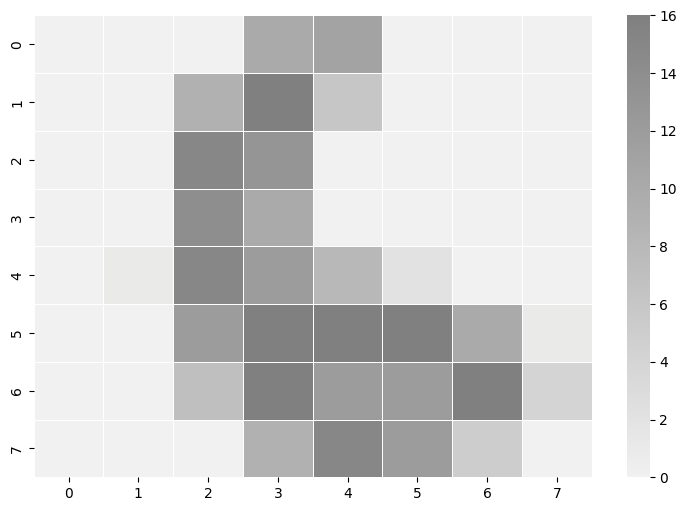

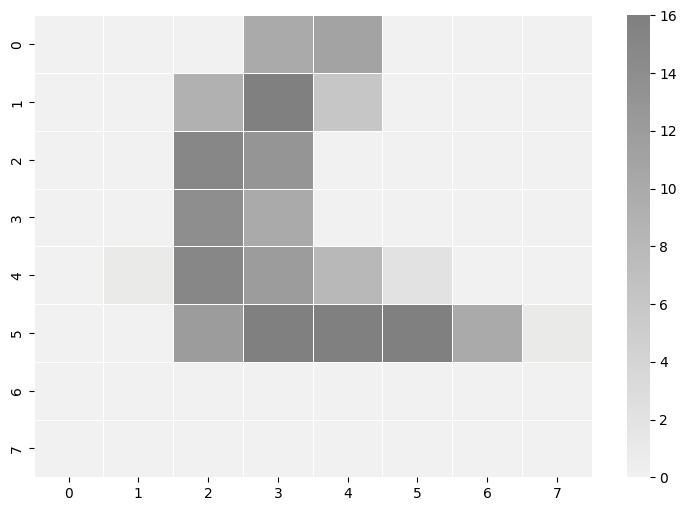

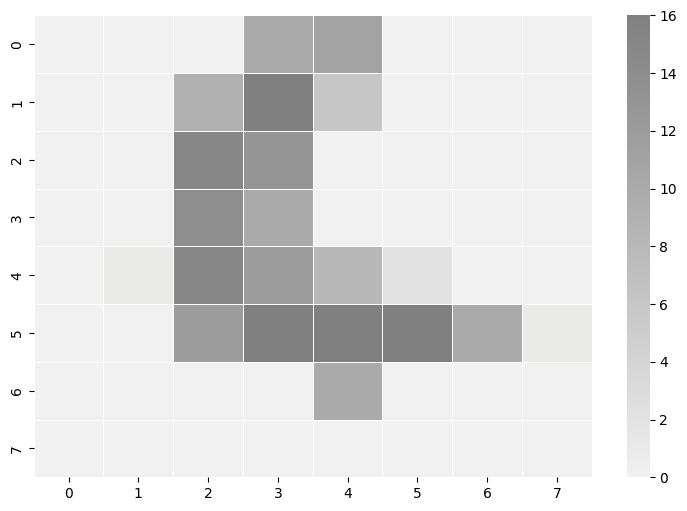

In [130]:
#
# Another example of predicting one pixel
#
row_to_show = 42                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)

# show without pix52
all_pixels[52] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix52
all_pixels[52] = np.round(pix52_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52




<br>

## Your first task:
+ create regressors for _all_ of the pixels on the bottom two rows
+ Use a loop! 16 times is too many for copy-paste-edit!

#### Second, create a slight variation on the visualization above, so that 
+ your system "dreams" all 16 of the bottom two rows of pixels
+ You will be able to see the dreamt digit alongside the real digit
+ <font color="Coral"><b>Show three examples (real and hallucinated!)</b></font> &nbsp;&nbsp; Choose three digits from the dataset and show the original vs. the digit-dreamt version alongside each other / side-by-side in this way. 


In [131]:
# one-pixel regression function for 2 rows

# construct the correct X_all from the columns we want
def one_pixel_regression(i):
    """  i is the pixel we are predicting
    """
    # print(f" ")
    # print(f" ")
    # print(f"Predicting pixel {i}!")
    X_all = A[:, 0:48]   # includes all other columns
    y_all = A[:,i]                    # y (labels) ... pixel we are predicting



    #
    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...


    #
    # We next separate into test data and training data ... 
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)


    #
    # for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
    #    This is done through the "StandardScaler" in scikit-learn
    #


    USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

    # we "train the scaler"  (computes the mean and standard deviation)
    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Here are our scaled training and testing sets:

    X_train_scaled = scaler.transform(X_train) # scale!
    X_test_scaled = scaler.transform(X_test) # scale!

    y_train_scaled = y_train  # the predicted/desired labels are not scaled
    y_test_scaled = y_test  # not using the scaler

    
     #
    # MLPRegressor predicts _floating-point_ outputs
    #

    from sklearn.neural_network import MLPRegressor

    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                        max_iter=500,          # how many training epochs
                        verbose=False,          # do we want to watch as it trains?
                        shuffle=True,          # shuffle each epoch?
                        random_state=None,     # use for reproducibility
                        learning_rate_init=.1, # how much of each error to back-propagate
                        learning_rate = 'adaptive')  # how to handle the learning_rate

    # print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    nn_regressor.fit(X_train_scaled, y_train_scaled)
    # print("++++++++++  TRAINING:   end  +++++++++++++++")
    # print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_:<6.3f}")
    # print(f"And, its square root:         {nn_regressor.loss_ ** 0.5:<6.3f}")
    # print()   
    return nn_regressor, scaler

    


The numeral is a 5



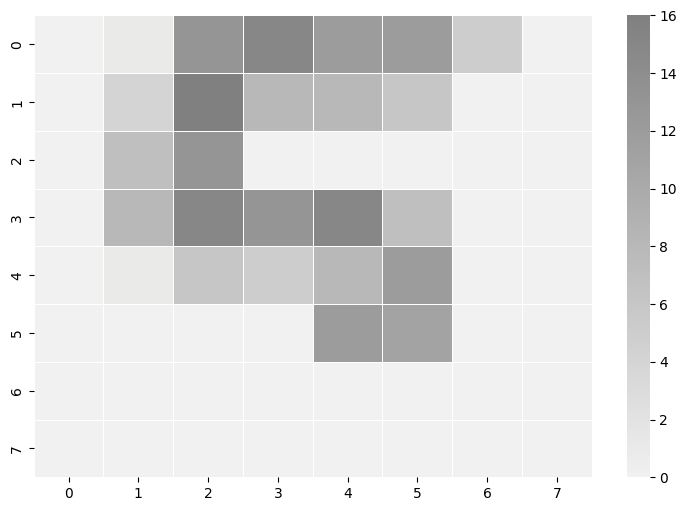

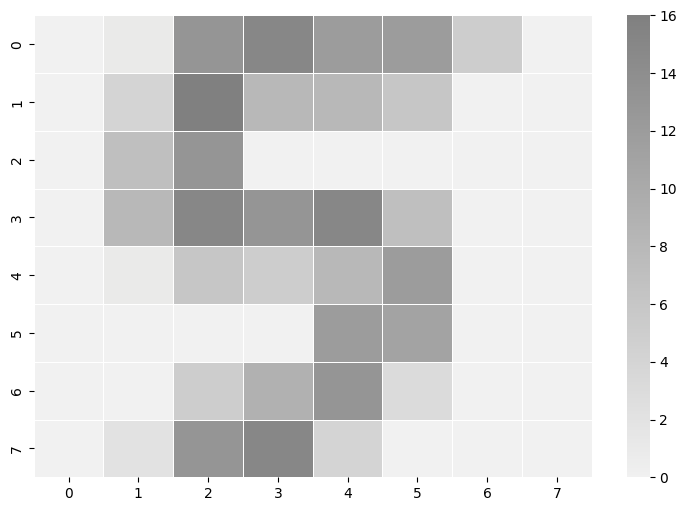

In [132]:
#
# Here we set up for a regression model that will predict the bottom two rows


row_to_show = 47                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show, 0:64]

def predict_from_model(pixels, model, scaler):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

pixpred = []

for i in range(48,64):
    first48pixels = all_pixels[0:48] 
    model, scaler = one_pixel_regression(i)   # build a new regressor for each pixel
    pixel_prediction = predict_from_model(first48pixels, model, scaler)
    pixpred.append(pixel_prediction[0])
    
# pix_predicted = predict_from_model(input_pixels, nn_regressor)
# pix_actual = A[row_to_show,i]

# print(f"pix{i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
show_digit( all_pixels ) 

# # show without pix52
# all_pixels[48:64] = 0         # omit this one
# show_digit( all_pixels )   # show without pixel 52

# show with pix52
for i in range(48,64):
    all_pixels[i] = np.round(pixpred[i-48])         # omit this one
show_digit( all_pixels )   # show with pixel 52

Beautiful!

The numeral is a 3



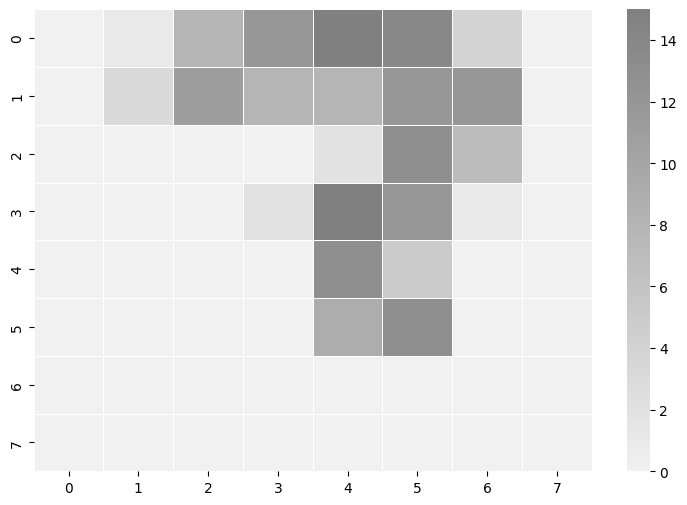

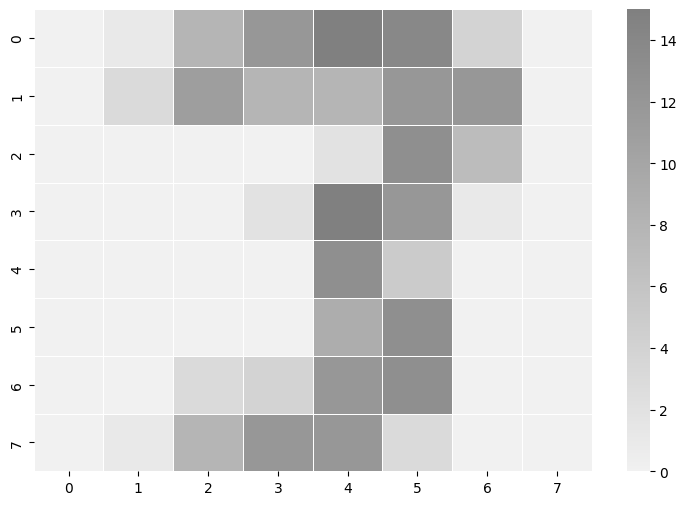

In [133]:
#
# Here we set up for a regression model that will predict the bottom two rows


row_to_show = 14                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show, 0:64]

def predict_from_model(pixels, model, scaler):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

pixpred = []

for i in range(48,64):
    first48pixels = all_pixels[0:48] 
    model, scaler = one_pixel_regression(i)   # build a new regressor for each pixel
    pixel_prediction = predict_from_model(first48pixels, model, scaler)
    pixpred.append(pixel_prediction[0])
    
# pix_predicted = predict_from_model(input_pixels, nn_regressor)
# pix_actual = A[row_to_show,i]

# print(f"pix{i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
show_digit( all_pixels ) 

# # show without pix52
# all_pixels[48:64] = 0         # omit this one
# show_digit( all_pixels )   # show without pixel 52

# show with pix52
for i in range(48,64):
    all_pixels[i] = np.round(pixpred[i-48])         # omit this one
show_digit( all_pixels )   # show with pixel 52

This prediction wasn't too good, but it is vaguely recognizable as a 3...

The numeral is a 0



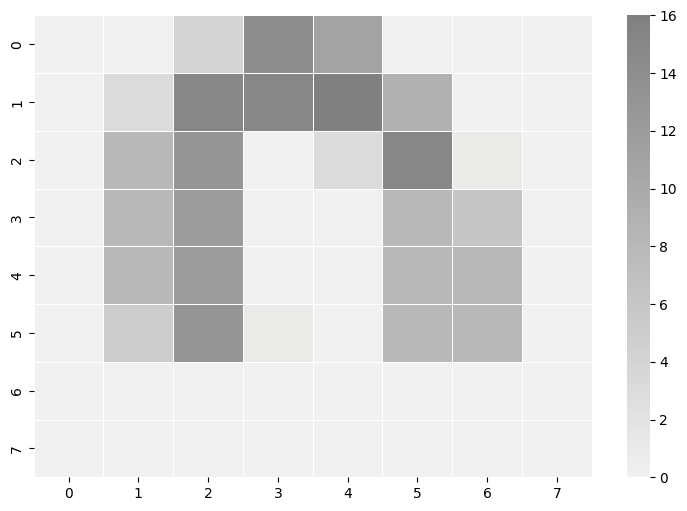

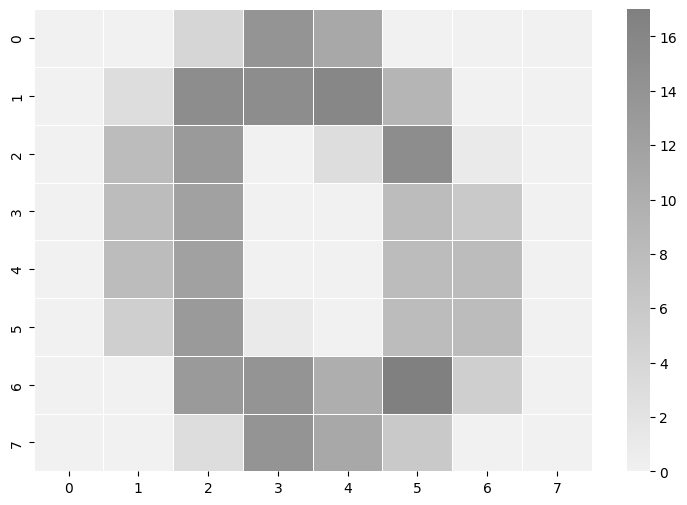

In [134]:
#
# Here we set up for a regression model that will predict the bottom two rows


row_to_show = 55                       # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show, 0:64]

def predict_from_model(pixels, model, scaler):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

pixpred = []

for i in range(48,64):
    first48pixels = all_pixels[0:48] 
    model, scaler = one_pixel_regression(i)   # build a new regressor for each pixel
    pixel_prediction = predict_from_model(first48pixels, model, scaler)
    pixpred.append(pixel_prediction[0])
    
# pix_predicted = predict_from_model(input_pixels, nn_regressor)
# pix_actual = A[row_to_show,i]

# print(f"pix{i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
show_digit( all_pixels ) 

# # show without pix52
# all_pixels[48:64] = 0         # omit this one
# show_digit( all_pixels )   # show without pixel 52

# show with pix52
for i in range(48,64):
    all_pixels[i] = np.round(pixpred[i-48])         # omit this one
show_digit( all_pixels )   # show with pixel 52

## Second task:

#### Then, predict __four__ rows, instead of two
+ Then, repeat/expand this process so that your code predicts the bottom **four** rows, instead of two
+ This time, you'll train and create 32 regressors (wow!)
+ Again, choose three digits (perhaps the same ones) and show what the system dreams for their four bottom rows vs. the actual!
+ For EC, try the bottom <b>six</b> rows -- or try the actually-unknown digits in <tt>partial_digits.csv</tt> -- and, perhaps, then try to classify the full digits the system generates from those partial ones... !

In [135]:
# one-pixel regression function for 4 row prediction 

# construct the correct X_all from the columns we want
def one_pixel_regression(i):
    """  i is the pixel we are predicting
    """
    # print(f" ")
    # print(f" ")
    # print(f"Predicting pixel {i}!")
    X_all = A[:, 0:32]   # includes all other columns
    y_all = A[:,i]                    # y (labels) ... pixel we are predicting



    #
    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...


    #
    # We next separate into test data and training data ... 
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)


    #
    # for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
    #    This is done through the "StandardScaler" in scikit-learn
    #


    USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

    # we "train the scaler"  (computes the mean and standard deviation)
    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Here are our scaled training and testing sets:

    X_train_scaled = scaler.transform(X_train) # scale!
    X_test_scaled = scaler.transform(X_test) # scale!

    y_train_scaled = y_train  # the predicted/desired labels are not scaled
    y_test_scaled = y_test  # not using the scaler

    
     #
    # MLPRegressor predicts _floating-point_ outputs
    #

    from sklearn.neural_network import MLPRegressor

    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                        max_iter=500,          # how many training epochs
                        verbose=False,          # do we want to watch as it trains?
                        shuffle=True,          # shuffle each epoch?
                        random_state=None,     # use for reproducibility
                        learning_rate_init=.1, # how much of each error to back-propagate
                        learning_rate = 'adaptive')  # how to handle the learning_rate

    # print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    nn_regressor.fit(X_train_scaled, y_train_scaled)
    # print("++++++++++  TRAINING:   end  +++++++++++++++")
    # print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_:<6.3f}")
    # print(f"And, its square root:         {nn_regressor.loss_ ** 0.5:<6.3f}")
    # print()   
    return nn_regressor, scaler

The numeral is a 5



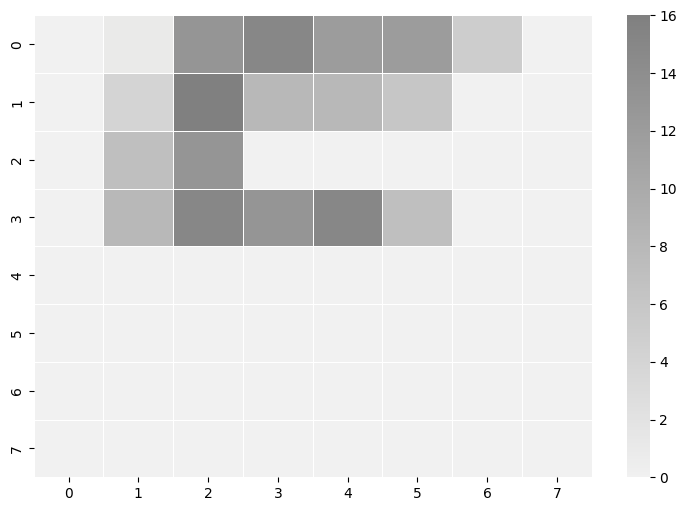

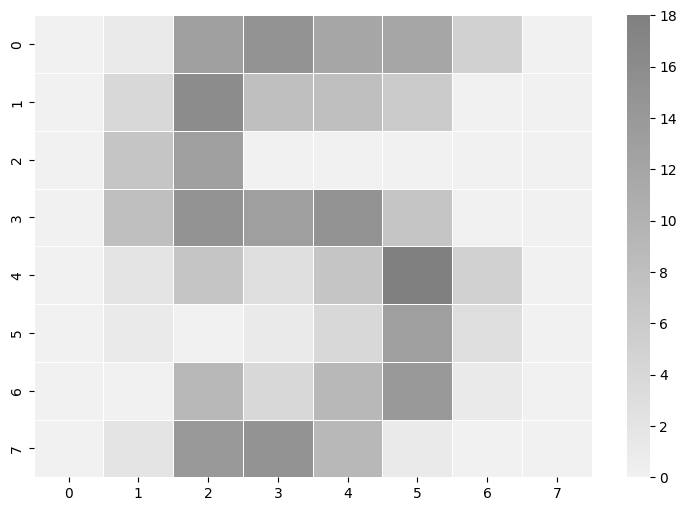

In [136]:
#
# Here we set up for a regression model that will predict the bottom two rows


row_to_show = 47                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show, 0:64]

def predict_from_model(pixels, model, scaler):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

pixpred = []

for i in range(32,64):
    first48pixels = all_pixels[0:32] 
    model, scaler = one_pixel_regression(i)   # build a new regressor for each pixel
    pixel_prediction = predict_from_model(first48pixels, model, scaler)
    pixpred.append(pixel_prediction[0])
    
# pix_predicted = predict_from_model(input_pixels, nn_regressor)
# pix_actual = A[row_to_show,i]

# print(f"pix{i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")

# erase last 16 pixels
all_pixels[32:64] = np.zeros(32)
show_digit( all_pixels ) 

# # show without pix52
# all_pixels[48:64] = 0         # omit this one
# show_digit( all_pixels )   # show without pixel 52

# show with pix52
for i in range(32,64):
    all_pixels[i] = np.round(pixpred[i-32])         # omit this one
show_digit( all_pixels )   # show with pixel 52

The numeral is a 3



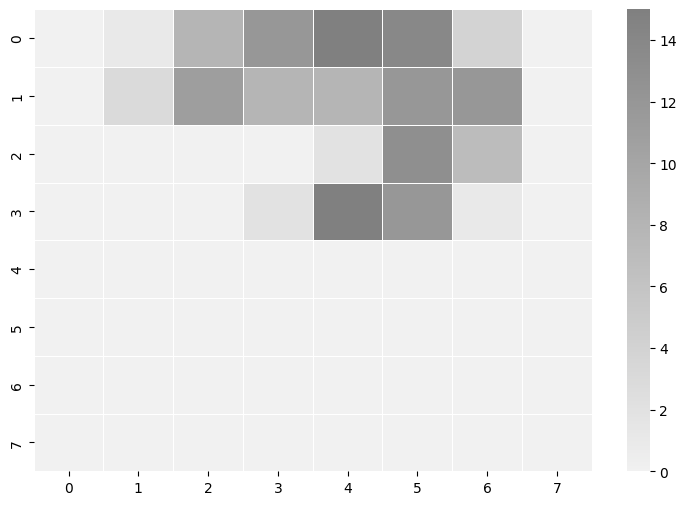

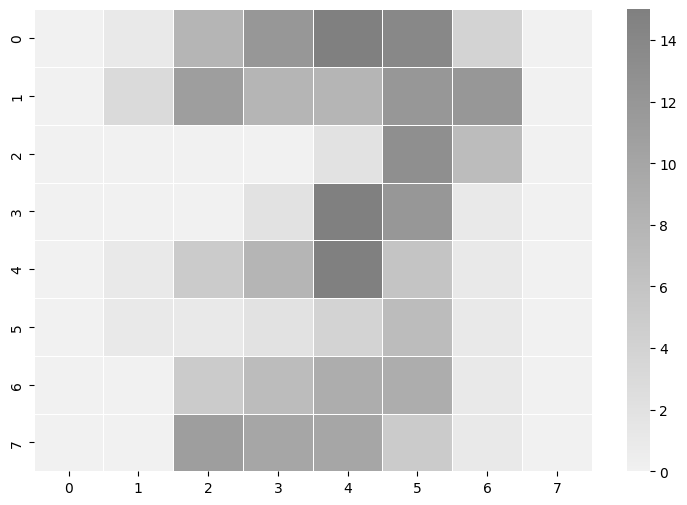

In [137]:
#
# Here we set up for a regression model that will predict the bottom two rows


row_to_show = 14                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show, 0:64]

def predict_from_model(pixels, model, scaler):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

pixpred = []

for i in range(32,64):
    first48pixels = all_pixels[0:32] 
    model, scaler = one_pixel_regression(i)   # build a new regressor for each pixel
    pixel_prediction = predict_from_model(first48pixels, model, scaler)
    pixpred.append(pixel_prediction[0])
    
# pix_predicted = predict_from_model(input_pixels, nn_regressor)
# pix_actual = A[row_to_show,i]

# print(f"pix{i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")

# erase last 16 pixels
all_pixels[32:64] = np.zeros(32)
show_digit( all_pixels ) 

# # show without pix52
# all_pixels[48:64] = 0         # omit this one
# show_digit( all_pixels )   # show without pixel 52

# show with pix52
for i in range(32,64):
    all_pixels[i] = np.round(pixpred[i-32])         # omit this one
show_digit( all_pixels )   # show with pixel 52

This one isn't too good either, but that makes sense as the first three rows look like it could be 2, 3, or 7. It also makes sense that the 32 model's dreamed pixels performed worse than the 16 model